In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [2]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo4e/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4e/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [3]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,27,0.333333,0,,0,,0.500000,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,27,1.000000,0,,0,,0.333333,NO
2,1.878734,1.455456,1.962,2.178,3.867700,0.006142,0.465936,1,0.041667,0,5,1,24,0.800000,0,,0,,0.250000,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,38,1.000000,0,,0,,0.333333,YES
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.600000,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.624779,1.420225,1.900,1.805,3.849615,0.003770,0.329502,0,0.062500,0,5,1,16,0.200000,0,,0,,0.500000,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,9,0,23,1.000000,0,,0,,0.666667,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,19,0.666667,0,,0,,0.500000,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,22,0.400000,0,,0,,1.000000,NO


<Axes: title={'center': 'Jaro-Winkler_rit'}, xlabel='clases'>

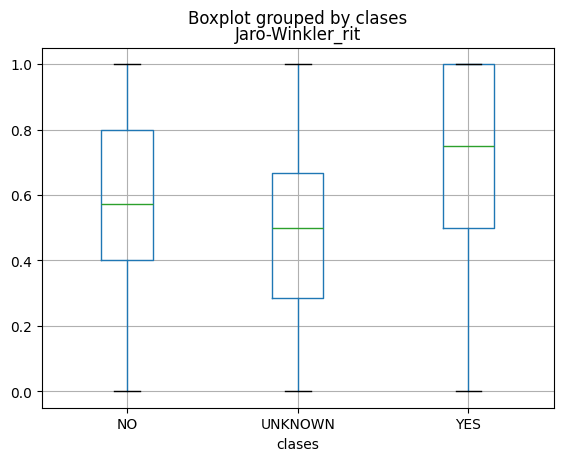

In [4]:
train.boxplot(by="clases",column="Jaro-Winkler_rit")

## Eliminar características

In [5]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,27,0.333333,0,,0,,0.500000,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,27,1.000000,0,,0,,0.333333,NO
2,1.878734,1.455456,1.962,2.178,3.867700,0.006142,0.465936,1,0.041667,0,5,1,24,0.800000,0,,0,,0.250000,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,38,1.000000,0,,0,,0.333333,YES
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.600000,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.624779,1.420225,1.900,1.805,3.849615,0.003770,0.329502,0,0.062500,0,5,1,16,0.200000,0,,0,,0.500000,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,9,0,23,1.000000,0,,0,,0.666667,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,19,0.666667,0,,0,,0.500000,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,22,0.400000,0,,0,,1.000000,NO


In [6]:
train[(train["list_m"]!=0) & (train["clases"]=="YES")]

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.600000,0,,0,,0.666667,YES
16,1.389238,2.871445,2.151,1.871,3.934430,0.004554,0.285345,0,0.125000,1,7,2,16,0.714286,0,,0,,0.750000,YES
25,1.858186,1.464642,2.498,1.329,3.887436,0.004578,0.291467,0,0.030303,0,4,1,33,0.500000,0,,0,,0.666667,YES
27,-0.053825,1.481927,2.117,1.335,3.875875,0.003966,0.090035,0,0.076923,0,4,1,13,0.000000,0,,0,,0.333333,YES
31,2.058963,1.441614,1.799,1.714,3.924461,0.006038,0.352919,0,0.043478,0,5,1,23,0.600000,0,,0,,0.333333,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,2.594912,1.434798,2.070,1.902,4.077736,0.002682,0.741229,1,0.058824,0,6,1,17,0.833333,0,,0,,0.500000,YES
779,2.378852,1.463399,2.044,2.065,3.936022,0.003553,0.389897,0,0.040000,0,7,1,25,0.571429,0,,0,,0.500000,YES
791,2.019526,1.452324,2.180,2.017,3.949004,0.003593,0.378576,1,0.055556,0,6,1,18,0.833333,1,make,0,,0.250000,YES
794,2.117322,1.436944,1.805,1.675,3.965707,0.004654,0.309267,1,0.037037,0,13,1,27,0.769231,0,,0,,0.600000,YES


In [7]:
train.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'verbT',
       'negH', 'verbH', 'overlap_ent', 'clases'],
      dtype='object')

In [8]:
train=train.drop(["verbT","verbH"],axis=1)

In [9]:
# train = train[['distancias', 'mutinf', 'max_info',  'diferencias','Jaro-Winkler_rit','overlap_ent','clases']]
# train

In [10]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [11]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [12]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.373550,0.172075,0.806848,0.729608,0.326319,0.838089,-0.031818,0.207555,0.144724,0.054842,0.361704,0.262715,-0.224979,0.040324,0.023043,-0.193674
distancias,0.373550,1.000000,-0.030783,0.600520,0.581545,0.378478,0.425869,0.159967,0.870859,0.218651,0.417722,0.998441,-0.047185,-0.432303,-0.027758,-0.000899,-0.379688
entropia_total,0.172075,-0.030783,1.000000,0.140019,0.058279,0.031405,0.124779,-0.001272,-0.011279,-0.019729,0.124274,-0.044394,-0.033983,0.042591,0.073999,0.004923,0.076146
entropias,0.806848,0.600520,0.140019,1.000000,0.952962,0.511434,0.862600,0.038612,0.520158,0.159571,0.090819,0.587452,-0.057901,-0.366590,-0.014142,0.031527,-0.314179
mutinf,0.729608,0.581545,0.058279,0.952962,1.000000,0.526773,0.807010,0.045705,0.493867,0.121861,0.083351,0.566262,-0.046089,-0.348510,-0.023814,0.031642,-0.307879
mearts,0.326319,0.378478,0.031405,0.511434,0.526773,1.000000,0.370058,0.037539,0.362232,0.098631,0.076353,0.384773,-0.071260,-0.228464,-0.044635,-0.000932,-0.249664
max_info,0.838089,0.425869,0.124779,0.862600,0.807010,0.370058,1.000000,-0.013741,0.344443,0.178482,0.027709,0.414119,0.007701,-0.274483,0.014258,0.045009,-0.205354
list_comp,-0.031818,0.159967,-0.001272,0.038612,0.045705,0.037539,-0.013741,1.000000,0.172932,-0.076787,0.176664,0.160405,-0.084299,-0.091985,0.022754,-0.017149,-0.290452
diferencias,0.207555,0.870859,-0.011279,0.520158,0.493867,0.362232,0.344443,0.172932,1.000000,0.208707,0.357644,0.873194,-0.315910,-0.398560,-0.059254,-0.003782,-0.334329
list_incomp,0.144724,0.218651,-0.019729,0.159571,0.121861,0.098631,0.178482,-0.076787,0.208707,1.000000,0.065502,0.219508,-0.021058,-0.050931,-0.001632,0.076916,0.026277


<Axes: >

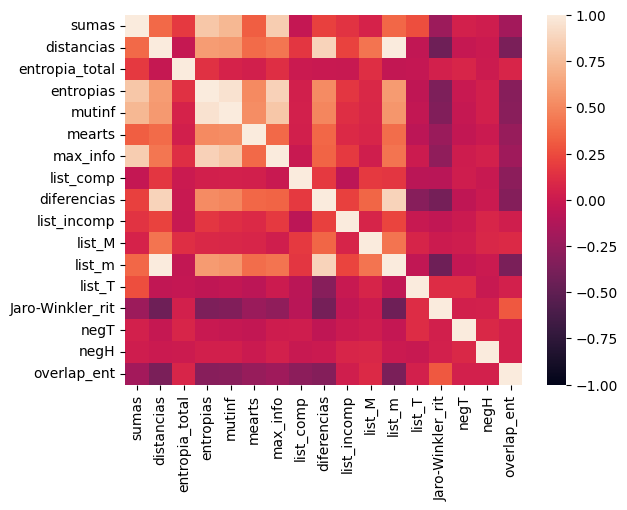

In [13]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [14]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.373550,0.172075,0.806848,0.729608,0.326319,0.838089,-0.031818,0.207555,0.144724,0.054842,0.361704,0.262715,-0.224979,0.040324,0.023043,-0.193674
distancias,0.373550,1.000000,-0.030783,0.600520,0.581545,0.378478,0.425869,0.159967,0.870859,0.218651,0.417722,0.998441,-0.047185,-0.432303,-0.027758,-0.000899,-0.379688
entropia_total,0.172075,-0.030783,1.000000,0.140019,0.058279,0.031405,0.124779,-0.001272,-0.011279,-0.019729,0.124274,-0.044394,-0.033983,0.042591,0.073999,0.004923,0.076146
entropias,0.806848,0.600520,0.140019,1.000000,0.952962,0.511434,0.862600,0.038612,0.520158,0.159571,0.090819,0.587452,-0.057901,-0.366590,-0.014142,0.031527,-0.314179
mutinf,0.729608,0.581545,0.058279,0.952962,1.000000,0.526773,0.807010,0.045705,0.493867,0.121861,0.083351,0.566262,-0.046089,-0.348510,-0.023814,0.031642,-0.307879
mearts,0.326319,0.378478,0.031405,0.511434,0.526773,1.000000,0.370058,0.037539,0.362232,0.098631,0.076353,0.384773,-0.071260,-0.228464,-0.044635,-0.000932,-0.249664
max_info,0.838089,0.425869,0.124779,0.862600,0.807010,0.370058,1.000000,-0.013741,0.344443,0.178482,0.027709,0.414119,0.007701,-0.274483,0.014258,0.045009,-0.205354
list_comp,-0.031818,0.159967,-0.001272,0.038612,0.045705,0.037539,-0.013741,1.000000,0.172932,-0.076787,0.176664,0.160405,-0.084299,-0.091985,0.022754,-0.017149,-0.290452
diferencias,0.207555,0.870859,-0.011279,0.520158,0.493867,0.362232,0.344443,0.172932,1.000000,0.208707,0.357644,0.873194,-0.315910,-0.398560,-0.059254,-0.003782,-0.334329
list_incomp,0.144724,0.218651,-0.019729,0.159571,0.121861,0.098631,0.178482,-0.076787,0.208707,1.000000,0.065502,0.219508,-0.021058,-0.050931,-0.001632,0.076916,0.026277


In [15]:
coor=pd.DataFrame(np.tril(train_m,-1),index=train_m.columns,columns=train_m.columns)
coor

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
distancias,0.373550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
entropia_total,0.172075,-0.030783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
entropias,0.806848,0.600520,0.140019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
mutinf,0.729608,0.581545,0.058279,0.952962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
mearts,0.326319,0.378478,0.031405,0.511434,0.526773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max_info,0.838089,0.425869,0.124779,0.862600,0.807010,0.370058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
list_comp,-0.031818,0.159967,-0.001272,0.038612,0.045705,0.037539,-0.013741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
diferencias,0.207555,0.870859,-0.011279,0.520158,0.493867,0.362232,0.344443,0.172932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
list_incomp,0.144724,0.218651,-0.019729,0.159571,0.121861,0.098631,0.178482,-0.076787,0.208707,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [16]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]>0.7:
            print(index,c,strings[c])

entropias sumas 0.8068476620799131
mutinf sumas 0.7296084985162334
mutinf entropias 0.9529621527452695
max_info sumas 0.8380891823955064
max_info entropias 0.8625999733250811
max_info mutinf 0.8070103499509608
diferencias distancias 0.8708587590143793
list_m distancias 0.9984407725009713
list_m diferencias 0.8731944955271419


In [17]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]<-0.7:
            print(index,c,strings[c])

In [18]:
# Checar variables colineales
#sns.relplot(data=train_m, x="mutinf", y="sumas")

In [19]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [20]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

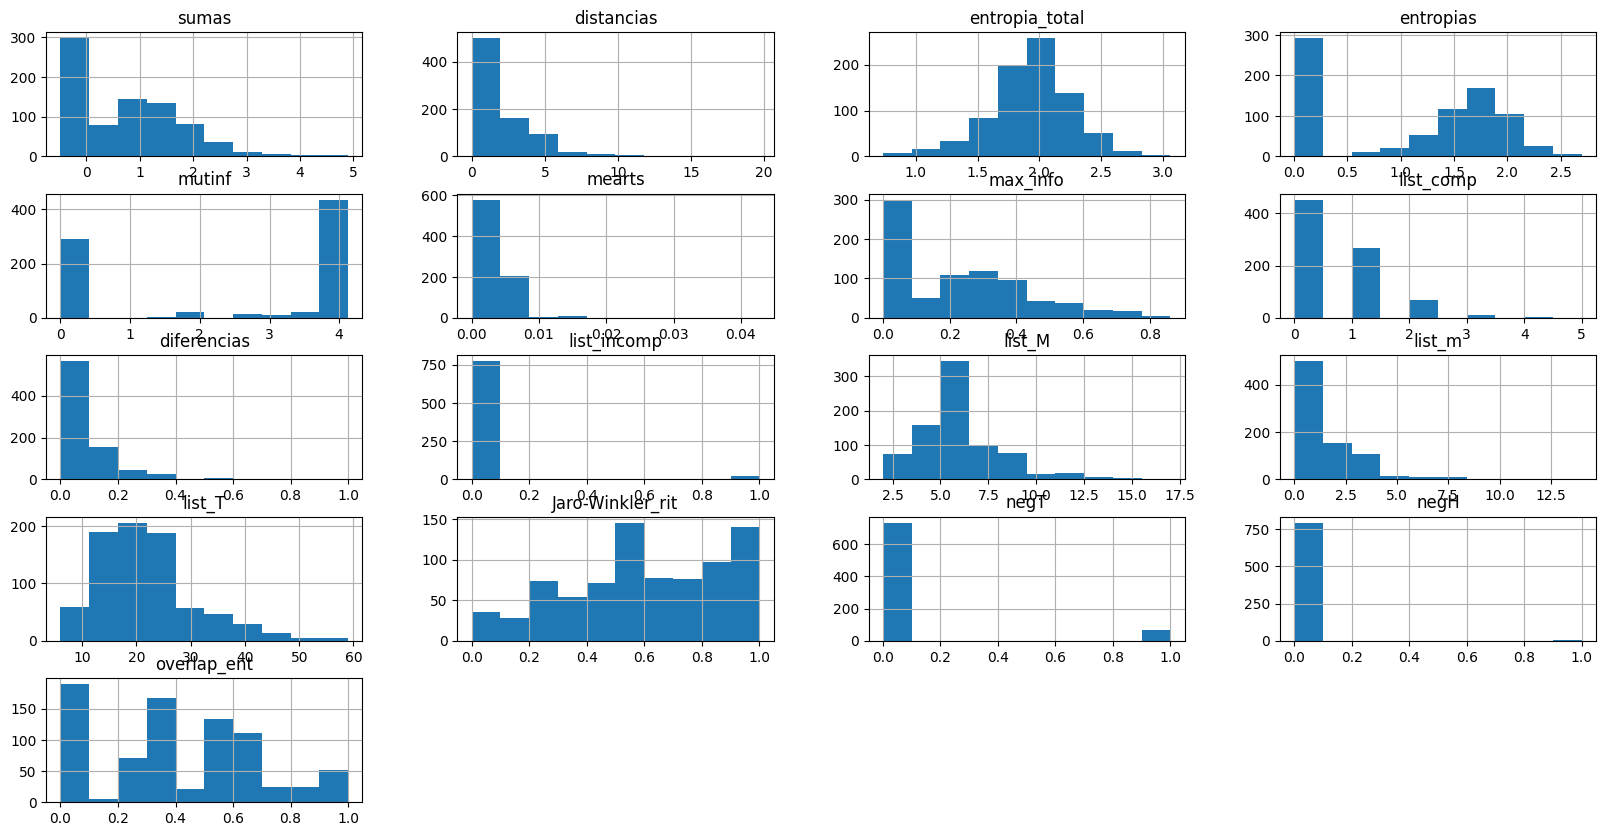

In [21]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [22]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo4e/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4e/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [23]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,2.231,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.400000,0,,0,,0.666667,YES
1,0.000000,0.000000,2.069,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.800000,0,,0,,0.333333,YES
2,0.000000,0.000000,1.765,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,14,0.500000,0,,0,,0.666667,YES
3,0.000000,0.000000,2.012,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,20,0.666667,0,,0,,1.000000,YES
4,1.216129,1.457741,1.691,1.861,3.880129,0.004272,0.201056,0,0.050000,0,4,1,20,0.000000,0,,0,,1.000000,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.490406,2.925519,2.198,2.206,3.861241,0.004049,0.631889,1,0.105263,1,5,2,19,0.400000,1,rush,0,,0.500000,YES
796,0.000000,0.000000,1.580,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,25,0.666667,0,,0,,0.333333,NO
797,0.000000,0.000000,1.828,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,24,0.000000,0,,0,,0.666667,UNKNOWN
798,0.366284,1.443915,1.767,0.881,3.781196,0.005778,0.129923,0,0.100000,0,4,1,10,0.500000,0,,0,,0.666667,UNKNOWN


In [24]:
#test=test.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#test = test[['list_incomp','list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]



In [25]:
test=test.drop(["verbT","verbH"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,2.231,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.400000,0,0,0.666667,YES
1,0.000000,0.000000,2.069,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.800000,0,0,0.333333,YES
2,0.000000,0.000000,1.765,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,14,0.500000,0,0,0.666667,YES
3,0.000000,0.000000,2.012,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,20,0.666667,0,0,1.000000,YES
4,1.216129,1.457741,1.691,1.861,3.880129,0.004272,0.201056,0,0.050000,0,4,1,20,0.000000,0,0,1.000000,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.490406,2.925519,2.198,2.206,3.861241,0.004049,0.631889,1,0.105263,1,5,2,19,0.400000,1,0,0.500000,YES
796,0.000000,0.000000,1.580,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,25,0.666667,0,0,0.333333,NO
797,0.000000,0.000000,1.828,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,24,0.000000,0,0,0.666667,UNKNOWN
798,0.366284,1.443915,1.767,0.881,3.781196,0.005778,0.129923,0,0.100000,0,4,1,10,0.500000,0,0,0.666667,UNKNOWN


In [26]:
#test = test[['distancias', 'mutinf', 'max_info',  'diferencias','Jaro-Winkler_rit','overlap_ent','clases']]


In [27]:
# test[(test["list_m"]==0) & (test["clases"]=="NO")].shape

In [28]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [29]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [30]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [31]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.        , 0.32244365, ..., 0.        , 0.        ,
        0.5       ],
       [0.        , 0.        , 0.55112708, ..., 0.        , 0.        ,
        0.33333333],
       [0.38349007, 0.0740187 , 0.640967  , ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.        , 0.        , 0.48709572, ..., 0.        , 0.        ,
        0.5       ],
       [0.        , 0.        , 0.54459327, ..., 0.        , 0.        ,
        1.        ],
       [0.32323126, 0.07505317, 0.61548514, ..., 0.        , 0.        ,
        0.66666667]])

In [32]:
X_train.shape

(800, 17)

In [33]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [34]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [35]:
model.decision_function(X_train)

array([ 4.12416705e-01,  1.15507615e+00,  3.43836253e-01,  1.18943395e+00,
        2.70194906e-01,  1.18814719e+00,  5.95280992e-01, -7.78690722e-01,
        8.49509555e-01, -8.99414389e-01,  5.53645638e-03,  4.56615976e-01,
        1.43819442e+00, -5.26291162e-02,  1.89788515e-01,  6.79287978e-01,
        3.43239153e-01,  4.87993244e-01, -8.96155677e-01,  6.38743889e-02,
        1.22840590e+00, -3.41860227e-01,  2.39847136e-01,  1.13605299e+00,
        8.72570007e-01,  4.05327541e-01,  8.72688394e-01, -1.05437343e+00,
        3.06698449e-01, -2.50137163e-01,  1.17799717e+00,  1.51705658e-01,
        8.55528511e-01,  8.51841120e-01, -9.00887199e-02,  3.81662561e-02,
        1.36856408e+00,  6.81520000e-01, -9.06204030e-03,  1.24832807e+00,
        7.35158896e-01, -1.01359306e-01,  5.04717372e-01,  1.23460553e-01,
       -5.03070453e-01,  7.19342347e-01,  2.47317934e-01,  1.06384387e+00,
        4.43263376e-01,  6.74301039e-01, -9.46626323e-01,  7.95419691e-01,
       -1.09021330e+00,  

In [36]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent'],
      dtype='object')

In [37]:
model.classes_

array([0, 1])

In [38]:
model.coef_[0]

array([ 0.80975257, -2.40332247,  0.18843122, -0.18187474, -0.36476275,
       -1.36806901,  0.5169335 ,  0.0520109 , -1.08132348,  0.20725871,
        0.53572491, -2.66491412,  0.27372855,  1.15996022, -0.1952611 ,
       -0.44884198,  0.88300265])

In [39]:
coeficientes=model.coef_[0]

In [40]:
coeficientes

array([ 0.80975257, -2.40332247,  0.18843122, -0.18187474, -0.36476275,
       -1.36806901,  0.5169335 ,  0.0520109 , -1.08132348,  0.20725871,
        0.53572491, -2.66491412,  0.27372855,  1.15996022, -0.1952611 ,
       -0.44884198,  0.88300265])

In [41]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  13 Jaro-Winkler_rit 11 list_m


In [42]:

n_columns=train.shape[1]-1

In [43]:
n_columns

17

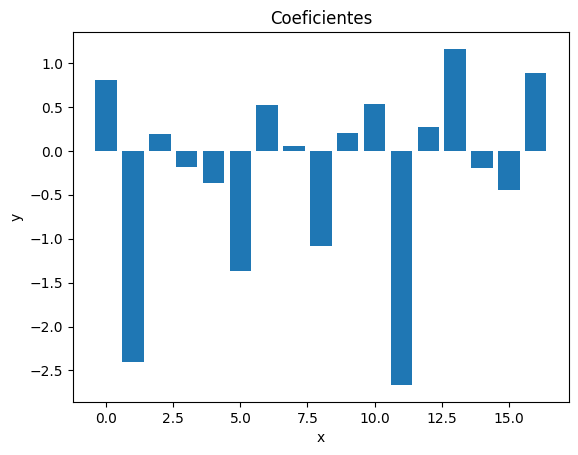

In [44]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [45]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.        , 0.        , 0.75524712, ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.        , 0.70040623, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.59749492, ..., 0.        , 0.        ,
        0.66666667],
       ...,
       [0.        , 0.        , 0.61882194, ..., 0.        , 0.        ,
        0.66666667],
       [0.06887561, 0.11002105, 0.59817197, ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.        , 0.859174  , ..., 0.        , 0.        ,
        1.        ]])

In [46]:
X_test.shape

(800, 17)

In [47]:
predictions = model.predict(X_test)

In [48]:
predictions

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [49]:
test["predicciones"]=predictions
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predicciones
0,0.000000,0.000000,2.231,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.400000,0,0,0.666667,YES,1
1,0.000000,0.000000,2.069,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.800000,0,0,0.333333,YES,1
2,0.000000,0.000000,1.765,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,14,0.500000,0,0,0.666667,YES,1
3,0.000000,0.000000,2.012,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,20,0.666667,0,0,1.000000,YES,1
4,1.216129,1.457741,1.691,1.861,3.880129,0.004272,0.201056,0,0.050000,0,4,1,20,0.000000,0,0,1.000000,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.490406,2.925519,2.198,2.206,3.861241,0.004049,0.631889,1,0.105263,1,5,2,19,0.400000,1,0,0.500000,YES,0
796,0.000000,0.000000,1.580,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,25,0.666667,0,0,0.333333,NO,1
797,0.000000,0.000000,1.828,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,24,0.000000,0,0,0.666667,UNKNOWN,1
798,0.366284,1.443915,1.767,0.881,3.781196,0.005778,0.129923,0,0.100000,0,4,1,10,0.500000,0,0,0.666667,UNKNOWN,0


In [50]:
incorrectos = test[(test["clases"]=="YES") & (test["predicciones"]==0)]
incorrectos

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predicciones
5,0.909818,1.395848,1.724,1.685,3.831012e+00,0.005715,0.377998,0,0.100000,0,4,1,10,0.500000,0,0,0.666667,YES,0
30,0.640856,1.470049,1.659,1.648,3.820110e+00,0.003708,0.216965,0,0.047619,0,5,1,21,0.400000,0,0,0.750000,YES,0
32,0.445439,1.433030,1.657,0.837,3.823568e+00,0.005280,0.096198,0,0.066667,0,4,1,15,0.500000,0,0,0.666667,YES,0
42,0.000000,1.000097,1.803,0.000,1.111111e-12,0.038242,0.000000,2,0.052632,0,7,1,19,0.428571,0,0,0.500000,YES,0
43,1.085965,2.885449,1.694,1.699,3.971615e+00,0.004929,0.265411,0,0.125000,0,5,2,16,0.600000,0,0,1.000000,YES,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,0.543857,1.470267,1.533,1.714,4.038391e+00,0.004641,0.185117,0,0.052632,0,6,1,19,0.666667,0,0,0.500000,YES,0
776,1.853175,1.448614,1.807,1.649,3.926249e+00,0.002858,0.761328,0,0.062500,0,7,1,16,0.000000,0,0,0.666667,YES,0
777,0.554415,1.456292,1.997,1.430,3.706484e+00,0.005312,0.190190,1,0.071429,0,5,1,14,0.800000,0,0,0.500000,YES,0
789,0.721474,1.420555,1.729,0.900,3.844811e+00,0.003267,0.139605,1,0.052632,0,4,1,19,0.500000,0,0,0.333333,YES,0


In [51]:
print(confusion_matrix(y_test, predictions))

[[239 151]
 [124 286]]


In [52]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.66
precision:  0.65
recall 0.7
f1_score:  0.68
matthews_score:  0.31


In [53]:
X_train.shape

(800, 17)

In [54]:
X_test.shape

(800, 17)

In [55]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [56]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [57]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.700000 (0.107727)
Logistic Regression Precision:: 0.710000 (0.116060)
Logistic Regression Recall:: 0.770000 (0.091296)
Logistic Regression F1-score:: 0.730000 (0.072804)


In [58]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.710000 (0.112485)
Logistic Regression Recall:: 0.700000 (0.107727)
Logistic Regression F1-score:: 0.690000 (0.124573)


In [59]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.700000 (0.112328)
Logistic Regression Recall:: 0.700000 (0.112207)
Logistic Regression F1-score:: 0.690000 (0.126934)


In [60]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.700000 (0.107727)
Logistic Regression Recall:: 0.700000 (0.107727)
Logistic Regression F1-score:: 0.700000 (0.107727)


In [61]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.380000 (0.239306)


In [58]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [56]:
#linear_model

In [81]:
#model = LogisticRegression()
#model.fit(X_train,y_train)

In [62]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.66      0.61      0.63       390
           1       0.65      0.70      0.68       410

    accuracy                           0.66       800
   macro avg       0.66      0.66      0.66       800
weighted avg       0.66      0.66      0.66       800



In [61]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [62]:
test.columns[:-1]

Index(['list_incomp', 'Jaro-Winkler_rit', 'overlap_ent', 'mutinf', 'list_m',
       'clases'],
      dtype='object')

In [63]:
explainer.expected_value

-0.07721617116650836

In [64]:
X_test

array([[0.        , 0.4       , 0.66666667, 0.        , 0.        ],
       [0.        , 0.8       , 0.33333333, 0.        , 0.        ],
       [0.        , 0.5       , 0.66666667, 0.        , 0.        ],
       ...,
       [0.        , 0.        , 0.66666667, 0.        , 0.        ],
       [0.        , 0.5       , 0.66666667, 0.9063162 , 0.11111111],
       [0.        , 1.        , 1.        , 0.        , 0.        ]])

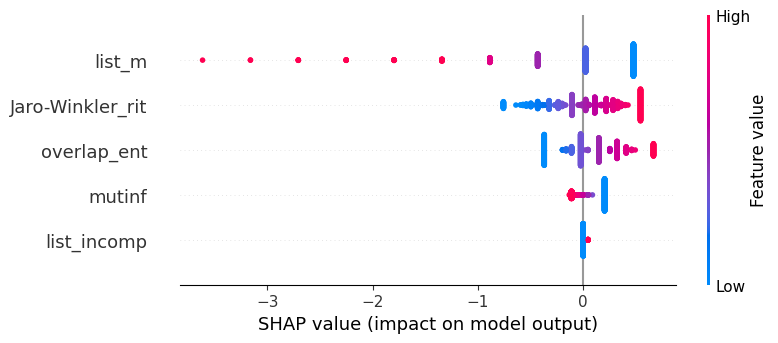

In [66]:
shap.plots.beeswarm(shap_values)

In [67]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.         0.8        0.33333333 0.89697426 0.11111111] 0 1


IndexError: index 5 is out of bounds for axis 0 with size 5

In [65]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.57684496 0.         0.         0.
 0.         0.         0.         0.         0.29411765 0.
 0.42857143 1.         0.         0.         0.66666667]


IndexError: index 1 is out of bounds for axis 2 with size 1

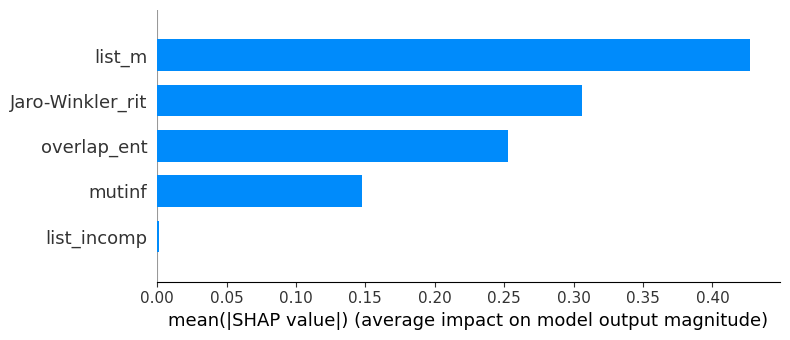

In [68]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

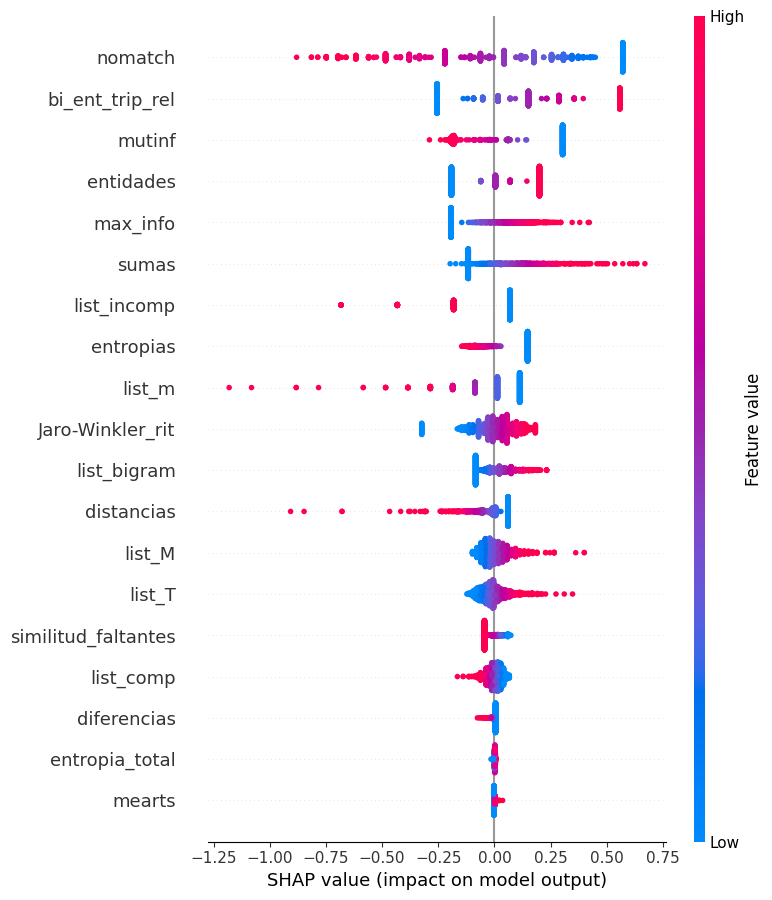

In [96]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

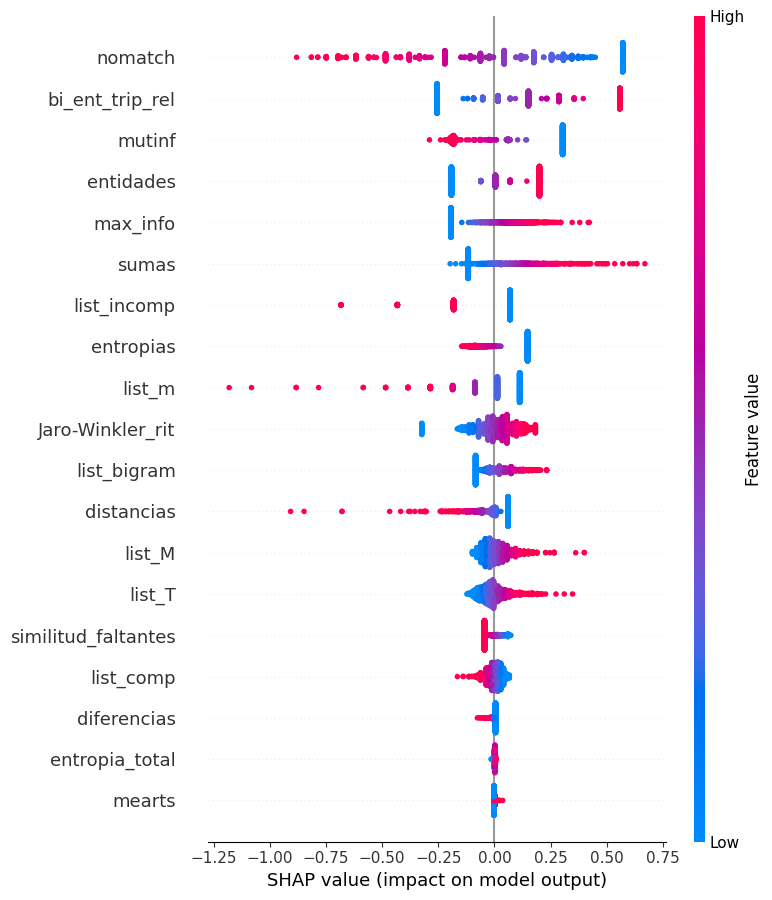

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

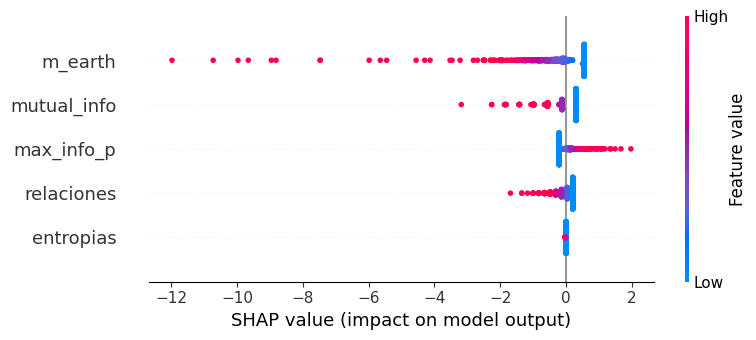

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [197]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [204]:
clf = DecisionTreeClassifier(splitter="random",criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [205]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.65
precision:  0.64
recall 0.72
f1_score:  0.68
matthews_score:  0.3


In [206]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [207]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.620000 (0.038039)
DecisionTree: 0.630000 (0.036153)
DecisionTree: 0.680000 (0.060250)
DecisionTree: 0.650000 (0.030989)


In [202]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[256, 134],
       [183, 227]])

Profundidad del árbol: 22
Número de nodos terminales: 278


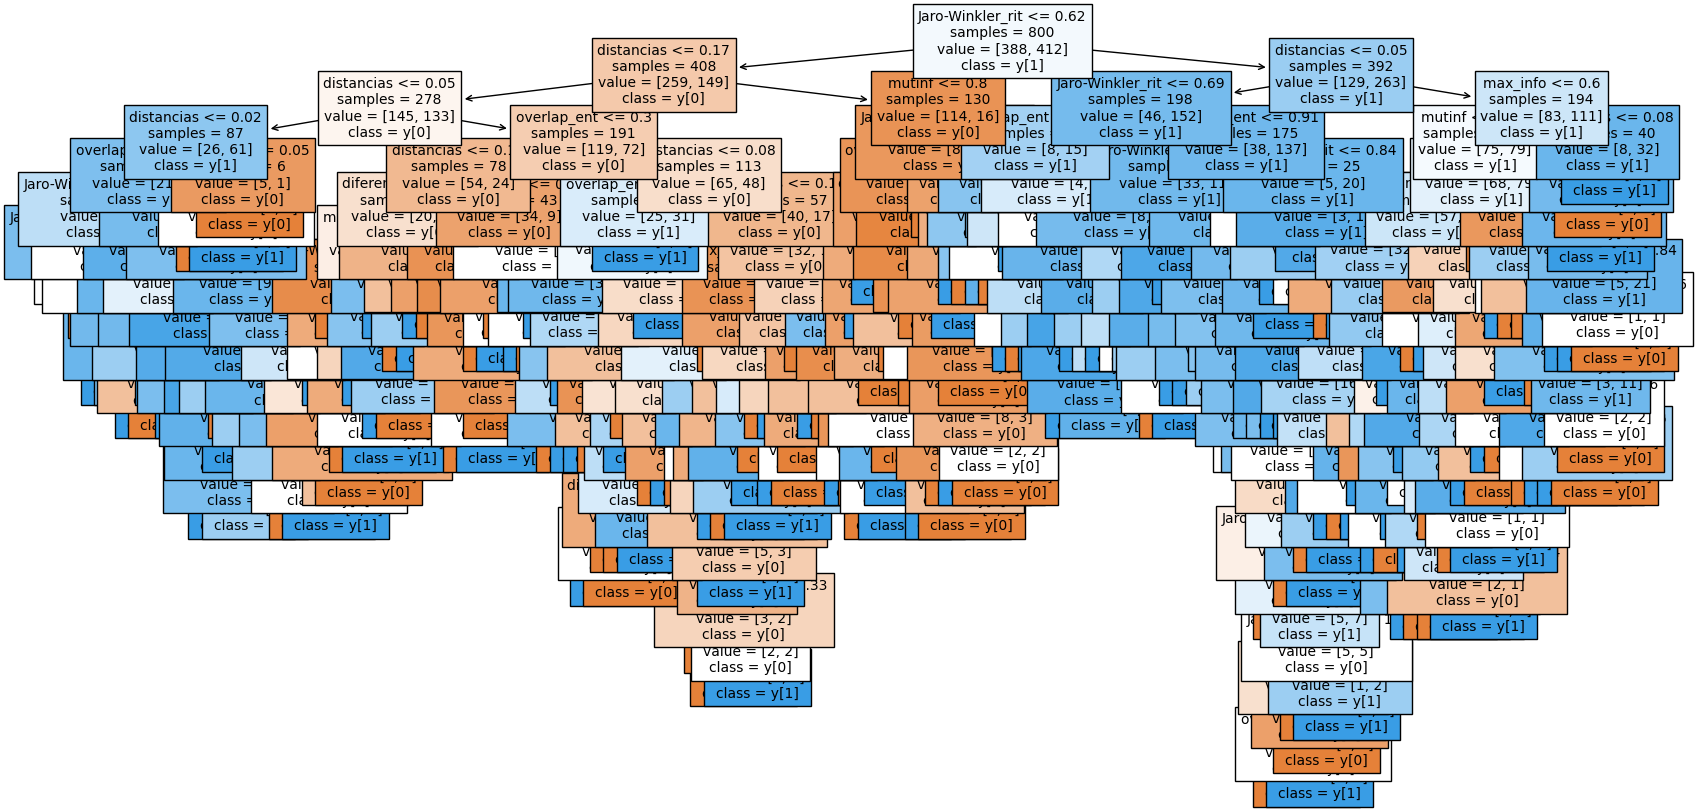

In [203]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )